# Financial Data Model using Random Forest

### Importing packages and modules require for exploratory and model building

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import pandas as pd
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_ds2 = drive.CreateFile({'id': '16kPFrY12PUhy45cxDKNbDEH5qiPIRUp8'})
file_ds2.GetContentFile('application_train.csv')
  
# !rm -rf dataset-master
!rm -rf application_train  


     |████████████████████████████████| 993kB 2.6MB/s 


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import pandas as pd
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_ds2 = drive.CreateFile({'id': '16xRjW4mSAFSxIQH5lTtamx1O9OrV3m79'})
file_ds2.GetContentFile('application_test.csv')
  
# !rm -rf dataset-master
!rm -rf application_test  

In [0]:
ls -l

total 145140
-rw-r--r-- 1 root root      2492 Aug 25 22:38 adc.json
-rw-r--r-- 1 root root  24076782 Aug 25 22:38 application_test.csv
-rw-r--r-- 1 root root 124528974 Aug 25 22:38 application_train.csv
drwxr-xr-x 1 root root      4096 Aug 22 16:14 sample_data/


In [0]:
import pandas as pd
import numpy as np

In [0]:
from sklearn.feature_selection import RFECV,RFE
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn import preprocessing

In [0]:
from sklearn import  metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [0]:
data = pd.read_csv('application_train.csv')

In [0]:
test_data = pd.read_csv('application_test.csv')

In [0]:
test_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257512 entries, 0 to 257511
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int64(42), object(16)
memory usage: 239.7+ MB


In [0]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [0]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,257512.000000,257512.000000,257512.000000,2.575120e+05,2.575120e+05,257501.000000,2.572720e+05,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,87533.000000,257512.0,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257511.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,112306.000000,256978.000000,206491.000000,126836.000000,106768.000000,131899.000000,86263.000000,77607.000000,120272.000000,127879.000000,129367.000000,...,127879.000000,129367.000000,82764.000000,104643.000000,81539.000000,128299.000000,78712.000000,115402.000000,133229.000000,256659.000000,256659.000000,256659.000000,256659.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,257512.000000,222727.000000,222727.000000,222727.000000,222727.000000,222727.000000,222727.000000
mean,307143.115397,0.080769,0.416509,1.684155e+05,5.988950e+05,27108.806240,5.382673e+05,0.020882,-16039.898366,63930.692845,-4987.836264,-2993.698562,12.067974,1.0,0.819581,0.199389,0.998163,0.281715,0.056926,2.151446,2.052619,2.031676,12.065527,0.015172,0.050934,0.040856,0.077825,0.230121,0.179526,0.502105,0.514503,0.510653,0.117376,0.088344,0.977676,0.752633,0.044587,0.078993,0.149564,0.226440,...,0.149053,0.226055,0.231638,0.067181,0.101997,0.108564,0.008595,0.028223,0.102519,1.422530,0.143732,1.405608,0.100382,-962.579709,0.000043,0.709590,0.000062,0.015001,0.088318,0.000186,0.081495,0.003938,0.000023,0.003844,0.000008,0.003584,0.002893,0.001285,0.009910,0.000260,0.008058,0.000575,0.000505,0.000326,0.006268,0.006901,0.034747,0.266833,0.266348,1.903653
std,86047.050997,0.272481,0.721749,1.105872e+05,4.025061e+05,14480.289657,3.693680e+05,0.013845,4364.493540,141368.981432,3522.373511,1509.494575,11.955994,0.0,0.384537,0.399542,0.042819,0.449836,0.231701,0.910552,0.509240,0.502838,3.268401,0.122237,0.219862,0.197958,0.267897,0.420911,0.383793,0.211072,0.191040,0.194872,0.108196,0.082396,0.059740,0.113322,0.075449,0.134612,0.099891,0.144538,...,0.100210,0.144968,0.161910,0.082523,0.093526,0.112259,0.047187,0.070261,0.107368,2.419727,0.447885,2.398374,0.363259,826.289029,0.006536,0.453952,0.007882,0.121558,0.283758,0.013652,0.273595,0.062627,0.004827,0.061885,0.002787,0.059762,0.053710,0.035829,0.099056,0.

In [0]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,157876,0,Cash loans,F,N,Y,0,67500.0,343800.0,16155.0,225000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.015221,-19421,-826,-293.0,-2651,NaN,1,1,1,1,1,0,Medicine staff,2.0,2,2,TUESDAY,14,0,0,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,4.0,1.0,-180,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,157878,0,Cash loans,M,Y,N,2,247500.0,945000.0,40167.0,945000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.019101,-15322,365243,-7733.0,-4788,6.0,1,0,0,1,0,0,NaN,4.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,-1965,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
2,157879,0,Revolving loans,M,N,Y,2,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.006207,-11120,-61,-953.0,-3474,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,SATURDAY,13,0,1,1,0,1,1,...,NaN,0.1123,NaN,0.031,NaN,NaN,0.0531,"Stone, brick",No,0.0,0.0,0.0,0.0,-1585,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,157880,0,Cash loans,F,N,Y,0,112500.0,295168.5,16011.0,238500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.030755,-11824,-4467,-1193.0,-2370,NaN,1,1,1,1,0,0,Laborers,2.0,2,2,SUNDAY,14,0,0,0,0,0,0,...,0.0128,0.0170,0.0,0.020,org spec account,block of flats,0.0200,Mixed,No,0.0,0.0,0.0,0.0,-1708,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,157881,0,Cash loans,F,N,Y,0,63000.0,298512.0,17266.5,270000.0,Unaccompanied,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,0.018029,-22102,365243,-2536.0,-4052,NaN,1,0,0,1,0,0,NaN,2.0,3,3,THURSDAY,4,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data[data['SK_ID_CURR'].duplicated()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


### Dropping ID variable as it doesnt have much predictive power in it.

In [0]:
data.drop('SK_ID_CURR', axis=1, inplace= True)

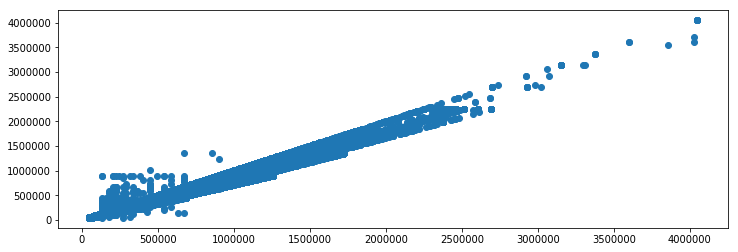

In [0]:
plt.scatter(data['AMT_CREDIT'],data['AMT_GOODS_PRICE'])

In [0]:
data.drop('AMT_GOODS_PRICE', inplace= True, axis=1)

In [0]:
data.drop('DAYS_LAST_PHONE_CHANGE', inplace= True, axis=1)

### Extracting numerical data from dataframe so that we can analyise and impute missing information

In [0]:
numerical_data = data._get_numeric_data().columns

In [0]:
numerical_data

Index(['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=103)

In [0]:
cat = preprocessing.LabelEncoder()
data['ORGANIZATION_TYPE'] = cat.fit_transform(data['ORGANIZATION_TYPE'])

In [0]:
data[numerical_data].head(5)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,67500.0,343800.0,16155.0,0.015221,-19421,-826,-293.0,-2651,NaN,1,1,1,1,1,0,2.0,2,2,14,0,0,0,1,1,0,NaN,0.583251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,1.0,4.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,2,247500.0,945000.0,40167.0,0.019101,-15322,365243,-7733.0,-4788,6.0,1,0,0,1,0,0,4.0,2,2,16,0,0,0,0,0,0,0.342195,0.623227,0.622922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
2,0,2,180000.0,540000.0,27000.0,0.006207,-11120,-61,-953.0,-3474,NaN,1,1,0,1,1,0,4.0,2,2,13,0,1,1,0,1,1,0.076905,0.430050,0.656158,0.0976,NaN,0.9861,NaN,NaN,0.1064,0.0917,0.3333,NaN,0.0577,...,0.12,0.1034,0.3333,NaN,0.0587,NaN,0.1123,NaN,0.031,0.0531,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
3,0,0,112500.0,295168.5,16011.0,0.030755,-11824,-4467,-1193.0,-2370,NaN,1,1,1,1,0,0,2.0,2,2,14,0,0,0,0,0,0,0.391924,0.447755,0.524496,0.0155,0.0111,0.9697,0.5852,0.0365,NaN,0.0862,0.0417,0.0833,0.0285,...,NaN,0.0862,0.0417,0.0833,0.0290,0.0128,0.0170,0.0,0.020,0.0200,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
4,0,0,63000.0,298512.0,17266.5,0.018029,-22102,365243,-2536.0,-4052,NaN,1,0,0,1,0,0,2.0,3,3,4,0,0,0,0,0,0,NaN,0.235905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# data[numerical_data].ix[:,0]

In [0]:
#plt.hist(data[numerical_data].iloc[:,3])

In [0]:
data[numerical_data][data[numerical_data].iloc[:,2]< 1000]

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [0]:
# columns to drop = ['SK_ID_CURR',]
# discrete_variable = ['']
# continous_variables = ['CNT_CHILDREN','AMT_INCOME_TOTAL']

### Further dividing columns into categorical and numerical if the count is less than 20. 

In [0]:
columns = list(data[numerical_data])

In [0]:
# dividing dataset into categorical and numerical columns
categorical = []
numerical = []

for i in columns:
    count = data[i].nunique()
    if count < 8:
        categorical.append(i)
    else:
        numerical.append(i)

In [0]:
test_data[numerical].isnull().sum()

CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         1
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                     32950
CNT_FAM_MEMBERS                     1
HOUR_APPR_PROCESS_START             0
EXT_SOURCE_1                    28172
EXT_SOURCE_2                      126
EXT_SOURCE_3                     9944
APARTMENTS_AVG                  25385
BASEMENTAREA_AVG                29199
YEARS_BEGINEXPLUATATION_AVG     24394
YEARS_BUILD_AVG                 33239
COMMONAREA_AVG                  34960
ELEVATORS_AVG                   26651
ENTRANCES_AVG                   25195
FLOORSMAX_AVG                   24875
FLOORSMIN_AVG                   33894
LANDAREA_AVG                    29721
LIVINGAPARTMENTS_AVG            34226
LIVINGAREA_A

### Removing columns containing missing values greater than 10 percent

In [0]:
columns_to_keep = []
columns_to_drop = []
for i in numerical:
    percentage = (data[i].isnull().sum()/257511)*100
    if percentage < 10.0:
        columns_to_keep.append(i)
    else:
        columns_to_drop.append(i)

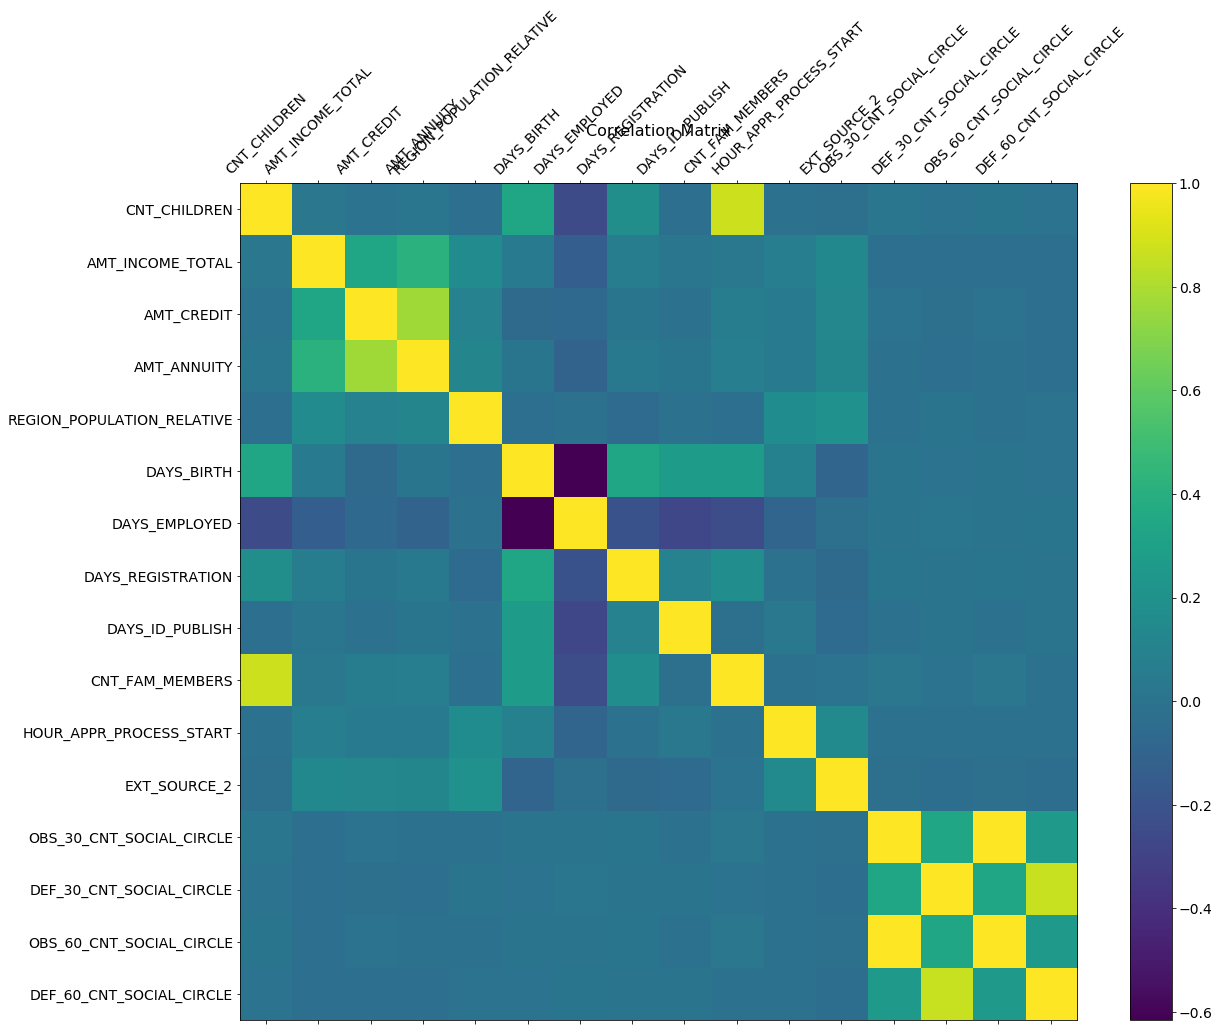

In [0]:
f = plt.figure(figsize=(19, 15))
plt.matshow(data[columns_to_keep].corr(), fignum=f.number)
plt.xticks(range(data[columns_to_keep].shape[1]), data[columns_to_keep].columns, fontsize=14, rotation=45)
plt.yticks(range(data[columns_to_keep].shape[1]), data[columns_to_keep].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [0]:
data['DAYS_BIRTH'] = round(data['DAYS_BIRTH']/-365).astype('int')


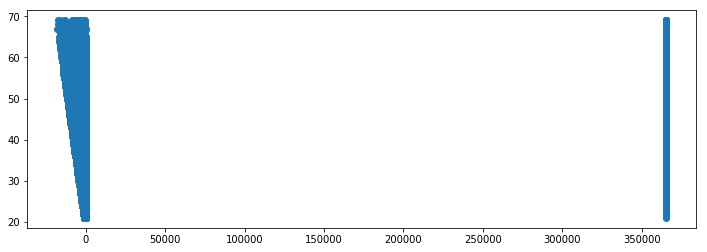

In [0]:
plt.scatter(data['DAYS_EMPLOYED'],data['DAYS_BIRTH'])

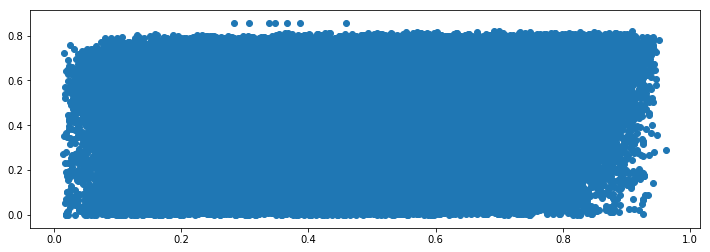

In [0]:
plt.scatter(data['EXT_SOURCE_1'],data['EXT_SOURCE_2'])

In [0]:
data['EXT_SOURCE_1'].isna().sum()

145206

In [0]:
days_employ = []
for i in range(len(data)):
    if data['DAYS_EMPLOYED'][i] < 0:
        days_employ.append(-data['DAYS_EMPLOYED'][i])
    else:
        days_employ.append(data['DAYS_EMPLOYED'][i])
    

In [0]:
data['DAYS_EMPLOYED'] = days_employ

### To check null values in every column so that we take appropriate action 

In [0]:
data[columns_to_keep].isnull().sum()

CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                    11
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
CNT_FAM_MEMBERS                 1
HOUR_APPR_PROCESS_START         0
EXT_SOURCE_2                  534
OBS_30_CNT_SOCIAL_CIRCLE      853
DEF_30_CNT_SOCIAL_CIRCLE      853
OBS_60_CNT_SOCIAL_CIRCLE      853
DEF_60_CNT_SOCIAL_CIRCLE      853
dtype: int64

In [0]:
data.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    222727.000000
mean          1.903653
std           1.870100
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          22.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

{'boxes': [<matplotlib.lines.Line2D at 0x7f7bfeeda080>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7bfeeda908>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7bfeee3320>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7bfeedaf98>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7bfeeda278>,
  <matplotlib.lines.Line2D at 0x7f7bfeeda5c0>]}

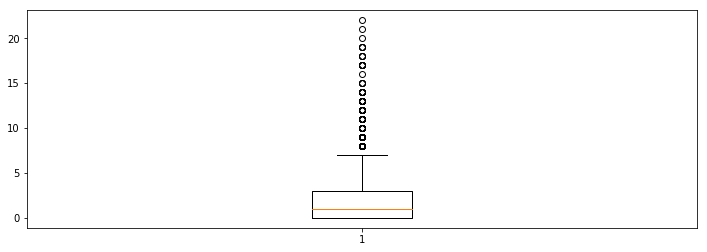

In [0]:
plt.boxplot(data.AMT_REQ_CREDIT_BUREAU_YEAR.dropna())

(array([1.55051e+05, 4.55740e+04, 1.60380e+04, 5.02500e+03, 9.41000e+02,
        6.60000e+01, 1.30000e+01, 8.00000e+00, 8.00000e+00, 3.00000e+00]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. , 13.2, 15.4, 17.6, 19.8, 22. ]),
 <a list of 10 Patch objects>)

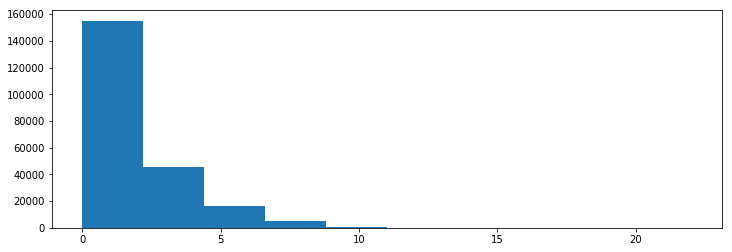

In [0]:
plt.hist(data['AMT_REQ_CREDIT_BUREAU_YEAR'].dropna())

In [0]:
data.AMT_REQ_CREDIT_BUREAU_YEAR.unique()

array([ 1.,  2.,  3., nan,  0.,  4.,  5.,  7.,  8.,  6.,  9., 12., 14.,
       10., 16., 13., 11., 22., 17., 19., 18., 21., 15., 20.])

### Based on distribution values are imputed accordingly. (More research could be done on this.) 

In [0]:
data['AMT_ANNUITY'].fillna(value=data['AMT_ANNUITY'].median(), inplace= True )
data['EXT_SOURCE_2'].fillna(value=data['EXT_SOURCE_2'].median(), inplace= True )
data['CNT_FAM_MEMBERS'].fillna(value=data['CNT_FAM_MEMBERS'].median(), inplace= True )
data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value=data['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace= True )
data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value=data['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace= True )
data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value=data['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace= True )
data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value=data['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace= True )


In [0]:
# data.dropna(axis=0, how='any', subset=['AMT_ANNUITY','AMT_GOODS_PRICE','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE',
#                                       'OBS_60_CNT_SOCIAL_CIRCLE'], inplace= True)

In [0]:
data[columns_to_keep].isnull().sum()

CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
DAYS_EMPLOYED                 0
DAYS_REGISTRATION             0
DAYS_ID_PUBLISH               0
CNT_FAM_MEMBERS               0
HOUR_APPR_PROCESS_START       0
EXT_SOURCE_2                  0
OBS_30_CNT_SOCIAL_CIRCLE      0
DEF_30_CNT_SOCIAL_CIRCLE      0
OBS_60_CNT_SOCIAL_CIRCLE      0
DEF_60_CNT_SOCIAL_CIRCLE      0
dtype: int64

## Handling Categorical variables

In [0]:
categorical_columns  = list(set(data.columns)- set(numerical_data))

In [0]:
data[categorical_columns].head()

,HOUSETYPE_MODE,FLAG_OWN_CAR,ORGANIZATION_TYPE,WALLSMATERIAL_MODE,CODE_GENDER,EMERGENCYSTATE_MODE,NAME_TYPE_SUITE,OCCUPATION_TYPE,NAME_CONTRACT_TYPE,FONDKAPREMONT_MODE,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,FLAG_OWN_REALTY,NAME_EDUCATION_TYPE,WEEKDAY_APPR_PROCESS_START,NAME_FAMILY_STATUS
0,NaN,N,30,NaN,F,NaN,Unaccompanied,Medicine staff,Cash loans,NaN,House / apartment,State servant,Y,Secondary / secondary special,TUESDAY,Married
1,NaN,Y,57,NaN,M,NaN,Unaccompanied,NaN,Cash loans,NaN,House / apartment,Pensioner,N,Secondary / secondary special,WEDNESDAY,Married
2,NaN,N,5,"Stone, brick",M,No,Unaccompanied,Sales staff,Revolving loans,NaN,House / apartment,Working,Y,Secondary / secondary special,SATURDAY,Married
3,block of flats,N,4,Mixed,F,No,Unaccompanied,Laborers,Cash loans,org spec account,House / apartment,Working,Y,Higher education,SUNDAY,Married
4,NaN,N,57,NaN,F,NaN,Unaccompanied,NaN,Cash loans,NaN,Municipal apartment,Pensioner,Y,Secondary / secondary special,THURSDAY,Civil marriage


In [0]:
lst = []
for i in range(len(categorical_columns)):
    lst.append(data[categorical_columns].iloc[:,i].value_counts())

In [0]:
categorical_combined = categorical+ categorical_columns

#data[categorical_columns].isnull().sum()

In [0]:
categorical_combined.remove('TARGET')

In [0]:
cat_columns_to_keep = []
cat_columns_to_drop = []
for i in categorical_combined:
    percentage = (data[i].isnull().sum()/257511)*100
    if percentage < 10.0:
        cat_columns_to_keep.append(i)
    else:
        cat_columns_to_drop.append(i)

In [0]:
fill_missing_values = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                       'AMT_REQ_CREDIT_BUREAU_QRT','NAME_TYPE_SUITE']

# for i in range(len(fill_missing_values)):
#     print(data[fill_missing_values].iloc[:,i].value_counts())

In [0]:
data[cat_columns_to_drop].isnull().sum()

AMT_REQ_CREDIT_BUREAU_HOUR     34785
HOUSETYPE_MODE                129222
WALLSMATERIAL_MODE            130882
EMERGENCYSTATE_MODE           122057
OCCUPATION_TYPE                80737
FONDKAPREMONT_MODE            176104
dtype: int64

In [0]:
cat_data = pd.get_dummies(data[cat_columns_to_keep].drop('NAME_TYPE_SUITE',axis=1), drop_first=True)

In [0]:
fill_data = pd.concat([cat_data,data[columns_to_keep]],axis=1)

In [0]:
fill_data['NAME_TYPE_SUITE'] = data['NAME_TYPE_SUITE']

In [0]:
x_train = fill_data[fill_data['NAME_TYPE_SUITE'].notnull()].drop('NAME_TYPE_SUITE',axis=1)
y_train = fill_data[fill_data['NAME_TYPE_SUITE'].notnull()]['NAME_TYPE_SUITE']
x_test =  fill_data[fill_data['NAME_TYPE_SUITE'].isnull()].drop('NAME_TYPE_SUITE',axis=1)
y_test = fill_data[fill_data['NAME_TYPE_SUITE'].isnull()]['NAME_TYPE_SUITE']

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OutputCodeClassifier, OneVsRestClassifier
from sklearn.svm import LinearSVC

In [0]:
clf = OneVsRestClassifier(LinearSVC(random_state=0))
clf.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=0, tol=0.0001, verbose=0),
                    n_jobs=None)

In [0]:
name_type = clf.predict(x_test)

In [0]:
y_test= pd.Series(name_type)

In [0]:
fill_new = pd.concat([x_train,x_test], ignore_index=True)

In [0]:
fill_y = pd.concat([y_train,y_test], ignore_index= True)

In [0]:
fill_y = pd.DataFrame({'NAME_TYPE_SUITE': fill_y})

In [0]:
fill_data = pd.concat([fill_new, fill_y], axis =1)

In [0]:
fill_data.head()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,FLAG_OWN_CAR_Y,CODE_GENDER_M,CODE_GENDER_XNA,NAME_CONTRACT_TYPE_Revolving loans,NAME_HOUSING_TYPE_House / apartment,...,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,FLAG_OWN_REALTY_Y,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,NAME_TYPE_SUITE
0,1,1,1,1,1,0,2,2,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,67500.0,343800.0,16155.0,0.015221,53,826,-293.0,-2651,2.0,14,0.583251,4.0,1.0,4.0,1.0,Unaccompanied
1,1,0,0,1,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,57,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,2,247500.0,945000.0,40167.0,0.019101,42,365243,-7733.0,-4788,4.0,16,0.623227,2.0,2.0,2.0,2.0,Unaccompanied
2,1,1,0,1,1,0,2,2,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,1,1,...,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,180000.0,540000.0,27000.0,0.006207,30,61,-953.0,-3474,4.0,13,0.430050,0.0,0.0,0.0,0.0,Unaccompanied
3,1,1,1,1,0,0,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,...,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,112500.0,295168.5,16011.0,0.030755,32,4467,-1193.0,-2370,2.0,14,0.447755,0.0,0.0,0.0,0.0,Unaccompanied
4,1,0,0,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,63000.0,298512.0,17266.5,0.018029,61,365243,-2536.0,-4052,2.0,4,0.235905,1.0,0.0,1.0,0.0,Unaccompanied


In [0]:
data['NAME_TYPE_SUITE'] = fill_data['NAME_TYPE_SUITE']

In [0]:
data['NAME_TYPE_SUITE'].isna().sum()

0

In [0]:
data.reset_index(inplace=True)

In [0]:
data.drop('index',axis=1, inplace = True)

In [0]:
target= data.TARGET
data.drop('TARGET',axis=1, inplace=True)

In [0]:
data_cat = pd.get_dummies(data[cat_columns_to_keep], drop_first=True)

In [0]:
#data_cat.columns

In [0]:
#data[columns_to_keep].count()

In [0]:
new_data = pd.concat([data_cat,data[columns_to_keep]],axis=1)

In [0]:
new_data.head()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,FLAG_OWN_CAR_Y,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,...,NAME_HOUSING_TYPE_With parents,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,FLAG_OWN_REALTY_Y,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,1,1,1,1,1,0,2,2,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,67500.0,343800.0,16155.0,0.015221,53,826,-293.0,-2651,2.0,14,0.583251,4.0,1.0,4.0,1.0
1,1,0,0,1,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,57,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,2,247500.0,945000.0,40167.0,0.019101,42,365243,-7733.0,-4788,4.0,16,0.623227,2.0,2.0,2.0,2.0
2,1,1,0,1,1,0,2,2,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,180000.0,540000.0,27000.0,0.006207,30,61,-953.0,-3474,4.0,13,0.430050,0.0,0.0,0.0,0.0
3,1,1,1,1,0,0,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,112500.0,295168.5,16011.0,0.030755,32,4467,-1193.0,-2370,2.0,14,0.447755,0.0,0.0,0.0,0.0
4,1,0,0,1,0,0,3,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,63000.0,298512.0,17266.5,0.018029,61,365243,-2536.0,-4052,2.0,4,0.235905,1.0,0.0,1.0,0.0


In [0]:
#target.value_counts()

In [0]:
#target = pd.DataFrame({'target':new_data.TARGET})

### Test Data has been under gone same process as training data so that structure of data matches. 

In [0]:
test_data[columns_to_keep].isnull().sum()

CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     1
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
CNT_FAM_MEMBERS                 1
HOUR_APPR_PROCESS_START         0
EXT_SOURCE_2                  126
OBS_30_CNT_SOCIAL_CIRCLE      168
DEF_30_CNT_SOCIAL_CIRCLE      168
OBS_60_CNT_SOCIAL_CIRCLE      168
DEF_60_CNT_SOCIAL_CIRCLE      168
dtype: int64

In [0]:
#test_data[cat_columns_to_keep].isna().sum()

In [0]:
# for i in range(len(test_data[columns_to_keep].index)) :
#     value = test_data[columns_to_keep].iloc[i].isnull().sum()
#     print(value)
#     if value > 2:
#         print("Nan in row ", i , " : " ,  value)

In [0]:
test_data.drop('AMT_GOODS_PRICE', inplace= True, axis=1)
test_data.drop('DAYS_LAST_PHONE_CHANGE', inplace= True, axis=1)

In [0]:
test_data[test_data['DAYS_BIRTH']>0]

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,...,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [0]:
test_data['DAYS_BIRTH'] = round(test_data['DAYS_BIRTH']/-365).astype('int')

In [0]:
days_employ = []
for i in range(len(test_data)):
    if test_data['DAYS_EMPLOYED'][i] < 0:
        days_employ.append(-test_data['DAYS_EMPLOYED'][i])
    else:
        days_employ.append(test_data['DAYS_EMPLOYED'][i])

In [0]:
test_data['DAYS_EMPLOYED'] = days_employ

In [0]:
test_data['AMT_ANNUITY'].fillna(value = test_data['AMT_ANNUITY'].median(), inplace= True)
test_data['EXT_SOURCE_2'].fillna(value = test_data['EXT_SOURCE_2'].median(), inplace= True)
test_data['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(value = test_data['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace= True)
test_data['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(value = test_data['OBS_60_CNT_SOCIAL_CIRCLE'].median(), inplace= True)
test_data['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(value= test_data['DEF_30_CNT_SOCIAL_CIRCLE'].median(), inplace= True)
test_data['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(value = test_data['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace= True)
test_data['CNT_FAM_MEMBERS'].fillna(value = test_data['CNT_FAM_MEMBERS'].median(), inplace= True)


In [0]:
cat = preprocessing.LabelEncoder()
test_data['ORGANIZATION_TYPE'] = cat.fit_transform(test_data['ORGANIZATION_TYPE'])

In [0]:
test_data['NAME_TYPE_SUITE'].isna().sum()

192

In [0]:
cat_data = pd.get_dummies(test_data[cat_columns_to_keep].drop('NAME_TYPE_SUITE',axis=1), drop_first=True)

In [0]:
fill_test_data = pd.concat([cat_data,test_data[columns_to_keep]],axis=1)

In [0]:
fill_test_data['NAME_TYPE_SUITE'] = test_data['NAME_TYPE_SUITE']

In [0]:
x_train_1 = fill_test_data[fill_test_data['NAME_TYPE_SUITE'].notnull()].drop('NAME_TYPE_SUITE',axis=1)
y_train_1 = fill_test_data[fill_test_data['NAME_TYPE_SUITE'].notnull()]['NAME_TYPE_SUITE']
x_test_1 =  fill_test_data[fill_test_data['NAME_TYPE_SUITE'].isnull()].drop('NAME_TYPE_SUITE',axis=1)
y_test_1 = fill_test_data[fill_test_data['NAME_TYPE_SUITE'].isnull()]['NAME_TYPE_SUITE']

In [0]:
test_clf = OneVsRestClassifier(LinearSVC(random_state=0))
test_clf.fit(x_train_1,y_train_1)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=0, tol=0.0001, verbose=0),
                    n_jobs=None)

In [0]:
test_name_type = test_clf.predict(x_test_1)

In [0]:
y_test_1= pd.Series(test_name_type)

In [0]:
fill_new_test = pd.concat([x_train_1,x_test_1], ignore_index=True)

In [0]:
fill_y_test = pd.concat([y_train_1,y_test_1], ignore_index= True)

In [0]:
fill_y_test = pd.DataFrame({'NAME_TYPE_SUITE': fill_y_test})

In [0]:
fill_data_test = pd.concat([fill_new_test, fill_y_test], axis =1)

In [0]:
fill_data_test.head()

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,ORGANIZATION_TYPE,FLAG_OWN_CAR_Y,CODE_GENDER_M,CODE_GENDER_XNA,NAME_CONTRACT_TYPE_Revolving loans,NAME_HOUSING_TYPE_House / apartment,...,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,FLAG_OWN_REALTY_Y,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,NAME_TYPE_SUITE
0,1,1,0,1,1,0,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,202500.0,406597.5,24700.5,0.018801,26,637,-3648,-2120,1.0,10,0.262949,2.0,2.0,2.0,2.0,Unaccompanied
1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,270000.0,1293502.5,35698.5,0.003541,46,1188,-1186,-291,2.0,11,0.622246,1.0,0.0,1.0,0.0,Family
2,1,1,1,1,1,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,1,1,0,1,1,...,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,67500.0,135000.0,6750.0,0.010032,52,225,-4260,-2531,1.0,9,0.555912,0.0,0.0,0.0,0.0,Unaccompanied
3,1,1,0,1,0,0,2,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,135000.0,312682.5,29686.5,0.008019,52,3039,-9833,-2437,2.0,17,0.650442,2.0,0.0,2.0,0.0,Unaccompanied
4,1,1,0,1,0,0,2,2,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,37,0,1,0,0,1,...,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,121500.0,513000.0,21865.5,0.028663,55,3038,-4311,-3458,1.0,11,0.322738,0.0,0.0,0.0,0.0,Unaccompanied


In [0]:
test_data['NAME_TYPE_SUITE'] = fill_data_test['NAME_TYPE_SUITE']

In [0]:
test_data_cat = pd.get_dummies(test_data[cat_columns_to_keep], drop_first=True)

In [0]:
test_data_total = pd.concat([test_data_cat,test_data[columns_to_keep]],axis=1)

In [0]:
columns_to_keep

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [0]:
target.value_counts()

0    236713
1     20799
Name: TARGET, dtype: int64

## Train Test Split - Machine Learning ALgorithms

In [0]:
X_train, X_test, y_train, y_test = train_test_split(new_data, target, test_size=0.1, random_state=42)

### Resampling methodolgies - Upsampling and downsampling both process has been applied to minimise the limitations of both method.

In [0]:
from sklearn.utils import resample

In [0]:
X = pd.concat([X_train,y_train], axis =1)

In [0]:
no_loan = X[X.TARGET==0]
loan = X[X.TARGET==1]

In [0]:
loan_upsampled = resample(loan, replace= True, n_samples= round(len(no_loan)/2),random_state= 22)

In [0]:
no_loan_downsample= resample(no_loan, replace= False, n_samples= len(loan_upsampled), random_state= 22)

In [0]:
sampled_data = pd.concat([loan_upsampled, no_loan_downsample],axis =0)

In [0]:
sampled_data.TARGET.value_counts()

1    94656
0    94656
Name: TARGET, dtype: int64

In [0]:
y_train = sampled_data.TARGET
X_train = sampled_data.drop('TARGET', axis=1)

## Grid search method to Fine tune the parameters and to find optimal parameters for our model

In [0]:
param_test1 = {'n_estimators':[500,750, 1000],
               'criterion' :['entropy']}


gsearch1 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=3)
gsearch1.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
gsearch1.best_score_,gsearch1.best_estimator_

(0.9937167534113278,
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=1000,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False))

### Random Forest has been used as a default model aa it can handle correlation and variance & bias issues. It is one of the state of the art algorithm.

#### First we used Random Forest to find top variables so that we can do variable selection and reduce the complexity of the model. To understand the effects of variables on the dataset and to the business sense.  

In [0]:
rf = RandomForestClassifier(n_estimators=1000, criterion = 'entropy')

In [0]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred_prob = rf.predict_proba(X_test)

In [0]:
y_pred = rf.predict(X_test)

In [0]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
recall = tp / (tp + fn)
prec = tp / (tp + fp)
F1 = 2 * recall * prec / (recall + prec)
print(recall, prec, F1)

0.06291148500365765 0.3449197860962567 0.10641369354506083


In [0]:
confusion_matrix(y_test, y_pred)

array([[46912,   490],
       [ 3843,   258]])

0.7020662329593239


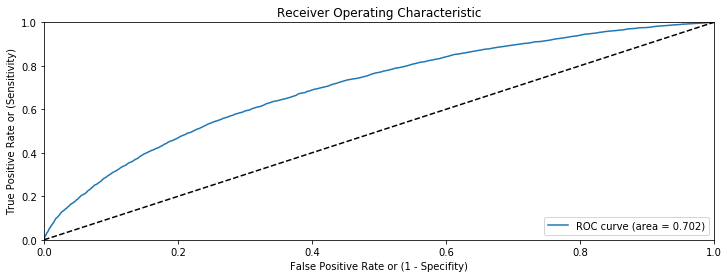

In [0]:
pred_prob = rf.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test,pred_prob[:,1])
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

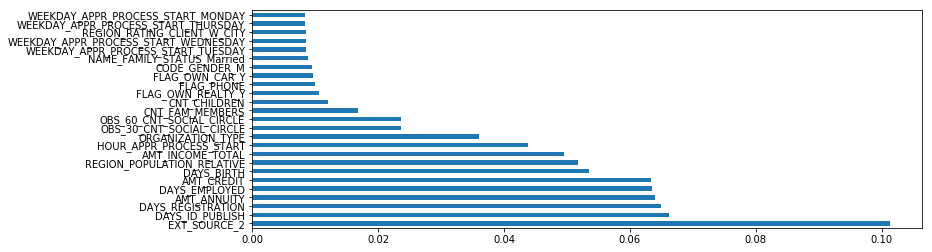

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(25).plot(kind='barh')

In [0]:
top_20_var = list(feat_importances.nlargest(20).index)

In [0]:
# XGBOOST Implementation

In [0]:
import xgboost as xgb

In [0]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", colsample_bytree= 0.6, gamma= 0.1,
                              alpha=0.4, learning_rate= 0.01, max_depth= 5, n_estimators= 3000,subsample = 0.7, n_jobs=-1)
xgb_model.fit(X_train[top_25_var],y_train)



XGBClassifier(alpha=0.4, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1,
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=3000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.7, verbosity=1)

In [0]:
y_pred = xgb_model.predict(X_test[top_25_var])

print(confusion_matrix(y_test, y_pred))

[[23685    10]
 [ 2044    13]]


0.7136371484028259


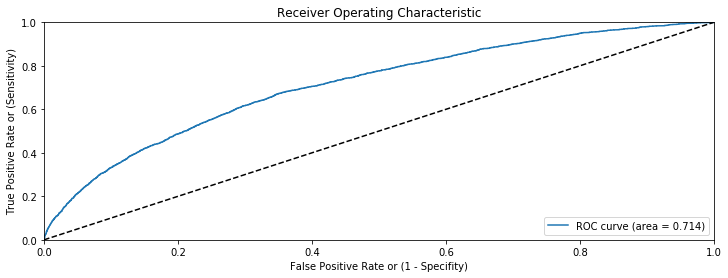

In [0]:
pred_prob = xgb_model.predict_proba(X_test[top_25_var])
fpr, tpr, threshold = metrics.roc_curve(y_test,pred_prob[:,1])
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

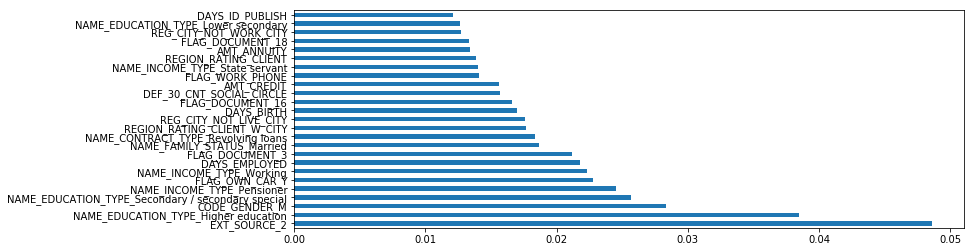

In [0]:
feat_importances = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(25).plot(kind='barh')

In [0]:
top_25_var = feat_importances.nlargest(25)

In [0]:
top_25_var = top_25_var.index

In [0]:

xgb_model = xgb.XGBClassifier(objective="binary:logistic")

params = {
    "colsample_bytree": [0.6],
    "gamma": [0.1],
    "learning_rate": [0.01], # default 0.1 
    "max_depth": [5,6], # default 3
    "n_estimators": [3000], # default 100
    "subsample": [0.7],
    "alpha" : [0.1,0.6]
}

gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = params, scoring='roc_auc',n_jobs=-1, cv=2)
gsearch1.fit(X_train,y_train)

NameError: ignored

In [0]:
gsearch1.best_params_

NameError: ignored

### The model has been built for prediction using Random Forest 

In [0]:
rf = RandomForestClassifier(n_estimators=750, criterion = 'entropy')

In [0]:
rf.fit(X_train[top_20_var],y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=750,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
y_pred = rf.predict(X_test[top_20_var])

In [0]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
recall = tp / (tp + fn)
prec = tp / (tp + fp)
F1 = 2 * recall * prec / (recall + prec)
print(recall, prec, F1)

0.08534503779565959 0.31446540880503143 0.13425393172228614


In [0]:
confusion_matrix(y_test, y_pred)

array([[46639,   763],
       [ 3751,   350]])

0.6933167268876793


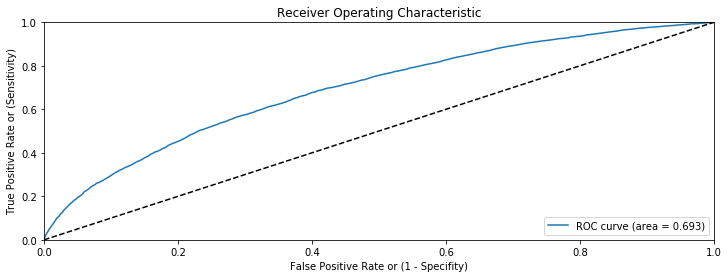

In [0]:
pred_prob = rf.predict_proba(X_test[top_20_var])
fpr, tpr, threshold = metrics.roc_curve(y_test,pred_prob[:,1])
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [0]:
from sklearn.feature_selection import RFECV,RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.cross_validation import train_test_split


### RFE method for feature selection 

In [0]:
logreg = LogisticRegression()
rfe = RFE(logreg, step=1, n_features_to_select=25)
rfe = rfe.fit(x_train,y_train)

ValueError: Found input variables with inconsistent numbers of samples: [256412, 189312]

In [0]:
features_bool = np.array(rfe.support_)
features = np.array(data.columns)
result = features[features_bool]
print(result)

### Select K best feature selection method

In [0]:
# Perform feature selection
selector = SelectKBest(chi2, k=25)
selector = selector.fit(x_train,y_train)
selector.pvalues_.shape
selector.pvalues_[selector.get_support(1)]

In [0]:
feature = selector.get_support(1)
df.columns[selector.get_support(1)]

In [0]:
#plotting top 25 value to see the importance of each variable
scores = -np.log10(selector.pvalues_[selector.get_support(1)])


plt.bar(range(len(data.columns[selector.get_support(1)])), scores)
plt.xticks(range(len(data.columns[selector.get_support(1)])), data.columns[selector.get_support(1)], rotation='vertical')
plt.show()

In [0]:
### Test Data ###

In [0]:
test_data_total[top_22_var].head()

In [0]:
test_data_total[top_22_var].isnull().sum()

## Test Data prediction  

In [0]:
y_pred = xgb_model.predict(test_data_total[top_25_var])

In [0]:
import numpy as np

In [0]:
unique, counts = np.unique(y_pred, return_counts=True)

In [0]:
print(unique,counts)

[0 1] [49960    39]


In [0]:
submission = pd.DataFrame()

In [0]:
submission['SK_ID_CURR'] = test_data['SK_ID_CURR']
submission['TARGET'] = y_pred

In [0]:
submission.to_csv("sample_submission_1.csv", index=False)

In [0]:
from google.colab import files
files.download('sample_submission_1.csv')